## Introduction to Ensemble Learning

Ensemble Learning is a robust and versatile technique in machine learning that combines multiple models to produce a more powerful and accurate model. It's particularly effective in improving the predictive performance of models and reducing the likelihood of an unfortunate selection of a poor one.

### What is Ensemble Learning?

Ensemble Learning refers to the process of constructing a set of models (often referred to as 'base learners') and combining their predictions to improve overall performance. The core idea is that a group of weak models can come together to form a strong model.

### How Does Ensemble Learning Work?

The Ensemble Learning process typically involves the following steps:
1. **Develop Multiple Models**: Develop several different models on the same dataset. These models can be of the same type or different types.
2. **Combine the Models**: Combine the predictions of these models. This can be done through various methods like averaging, weighted averaging, or voting.
3. **Make Predictions**:
   - For classification tasks, the ensemble can vote on the output class.
   - For regression tasks, it can average the predicted values.

### Benefits of Ensemble Learning

- **Improved Accuracy**: Combining models often leads to better predictive performance than any single model.
- **Reduces Overfitting**: It helps in reducing overfitting by averaging out biases.
- **Handles Variety of Data**: Ensemble methods can handle various data types and distributions effectively.

### Challenges with Ensemble Learning

- **Increased Complexity**: Ensembles can be more complex to understand and interpret compared to individual models.
- **Computationally Intensive**: Training multiple models can be computationally expensive.
- **Risk of Overfitting with Bad Base Models**: If the base models are too weak or too correlated, ensemble methods might not perform well.

### Implementing Ensemble Learning

Implementation typically starts with selecting appropriate base models and ensemble techniques, followed by training individual models and combining their predictions.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme with a specific style and palette
sns.set_theme(style="whitegrid", palette="pastel")

## Dataset Overview

In this section, we will be working with a dataset that focuses on CO2 emissions from various car models, incorporating different properties of the cars. This dataset is particularly relevant as it offers insights into the environmental impact of different vehicles, a critical aspect in the era of climate change awareness.

### Data Source

The dataset is compiled from Canadian sources and encompasses a range of car properties including make, model, fuel type, and engine size. Such comprehensive data allows for a analysis of factors contributing to CO2 emissions. The dataset can be found at [this link](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles).


In [7]:
fuel_df = pd.read_csv("Data/CO2_Emissions_Canada.csv")

# Remove duplicates from the dataset
fuel_df = fuel_df.drop_duplicates()

# Filter out the 'N' fuel type
fuel_df = fuel_df[fuel_df['Fuel Type'] != 'N']
# fuel_df = fuel_df[fuel_df['Fuel Type'] != 'Z']

# Sample 140 instances from each fuel type
fuel_df = fuel_df.groupby('Fuel Type').sample(n=140, random_state=1)

# Count the number of instances of each fuel type
fuel_type_counts = fuel_df['Fuel Type'].value_counts()

# Display the counts
print(fuel_type_counts)
fuel_df

D    140
E    140
X    140
Z    140
Name: Fuel Type, dtype: int64


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4716,FORD,F-150,PICKUP TRUCK - STANDARD,3.0,6,AS10,D,10.8,8.0,9.5,30,256
4571,CHEVROLET,CRUZE DIESEL,COMPACT,1.6,4,A9,D,7.7,5.0,6.5,43,175
2277,BMW,328d xDRIVE TOURING,STATION WAGON - SMALL,2.0,4,AS8,D,7.7,5.7,6.8,42,183
4741,FORD,F-150 4X4 XL/XLT,PICKUP TRUCK - STANDARD,3.0,6,AS10,D,11.2,8.4,9.9,29,266
4581,CHEVROLET,EQUINOX AWD,SUV - SMALL,1.6,4,A6,D,8.5,6.1,7.4,38,198
...,...,...,...,...,...,...,...,...,...,...,...,...
6997,JAGUAR,XE P300 AWD,COMPACT,2.0,4,AS8,Z,10.7,7.7,9.4,30,220
2215,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,343
2207,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,235
3409,BMW,650i xDRIVE COUPE,COMPACT,4.4,8,AS8,Z,13.8,9.1,11.7,24,273


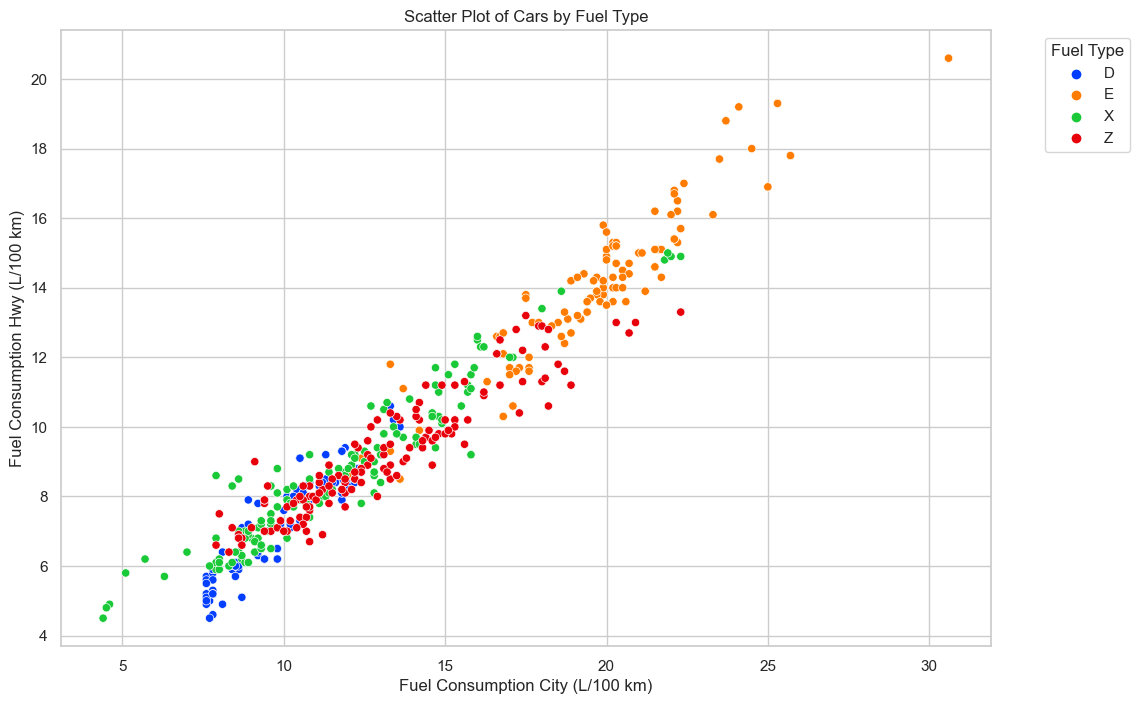

In [8]:
# Create a scatter plot focusing only on Fuel Type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fuel_df, x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', hue='Fuel Type', palette='bright')

# Adding labels and title for clarity
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption Hwy (L/100 km)')
plt.title('Scatter Plot of Cars by Fuel Type')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


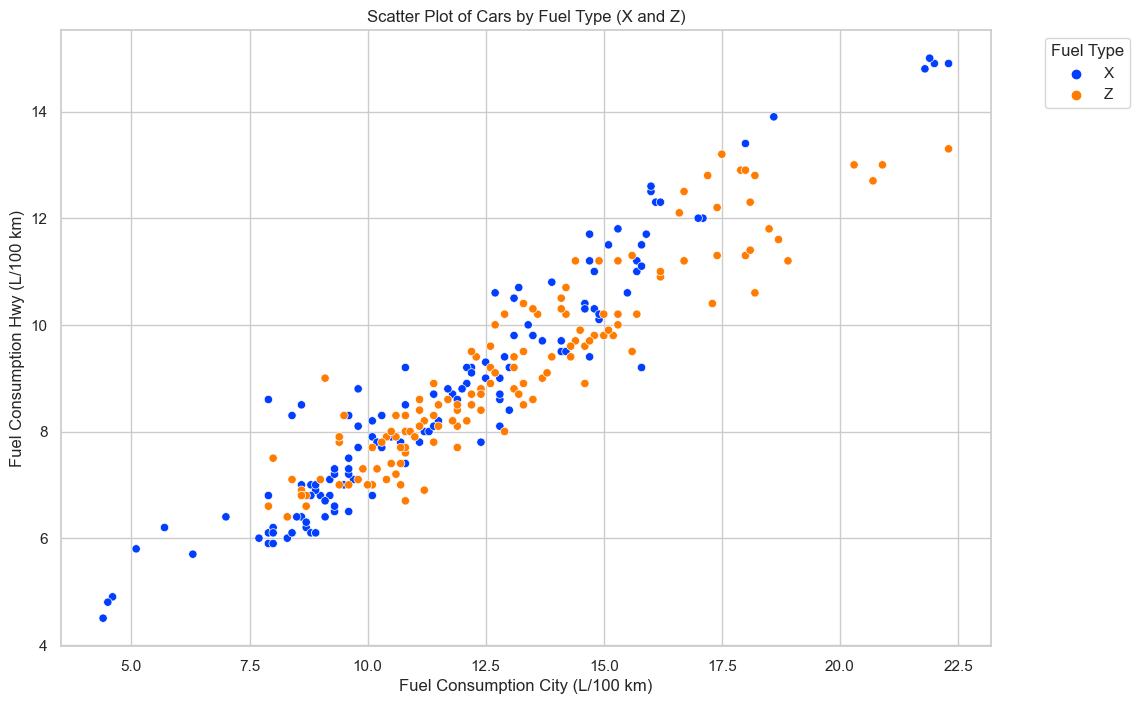

In [9]:
# Create a temporary subset of the data with only fuel types 'X' and 'Z'
temp_df = fuel_df[fuel_df['Fuel Type'].isin(['X', 'Z'])]

# Create the scatter plot for this subset
plt.figure(figsize=(12, 8))
sns.scatterplot(data=temp_df, x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', hue='Fuel Type', palette='bright')

# Adding labels and title for clarity
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption Hwy (L/100 km)')
plt.title('Scatter Plot of Cars by Fuel Type (X and Z)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In the exploration of our dataset `fuel_df`, we observe a significant overlap among the instances of different fuel types. This overlap raises a question about the potential performance of machine learning algorithms in effectively distinguishing between these categories. To address this, we will conduct tests to evaluate the performance of various algorithms. Depending on their performance, we may need to explore additional strategies or modifications to improve the model's ability to differentiate between fuel types accurately.

In [10]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Filter the dataset to include only Fuel Types 'X' and 'Z'
filtered_df = fuel_df[fuel_df['Fuel Type'].isin(['X', 'Z'])]

# Define features and target variable
# Assuming you still want to predict 'Fuel Type' based on city and highway fuel consumption
X = filtered_df[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
y = filtered_df['Fuel Type']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

# Initialize the classifiers
log_clf = LogisticRegression(max_iter=1000) # Increase max_iter if convergence issues arise
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)],
    voting='hard'
)

# Fit and predict with each classifier
for clf in (svm_clf, log_clf, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_score(y_test, y_pred)}")



SVC accuracy: 0.6875
LogisticRegression accuracy: 0.6071428571428571
RandomForestClassifier accuracy: 0.6607142857142857
VotingClassifier accuracy: 0.6964285714285714


In our analysis, the Support Vector Classifier (SVC) and the Voting Classifier, which combines SVC, Logistic Regression, and Random Forest, showed promising effectiveness in differentiating between Fuel Types 'X' and 'Z'. While Logistic Regression and Random Forest also contributed to the ensemble, the SVC appears to be a particularly strong performer in this context.

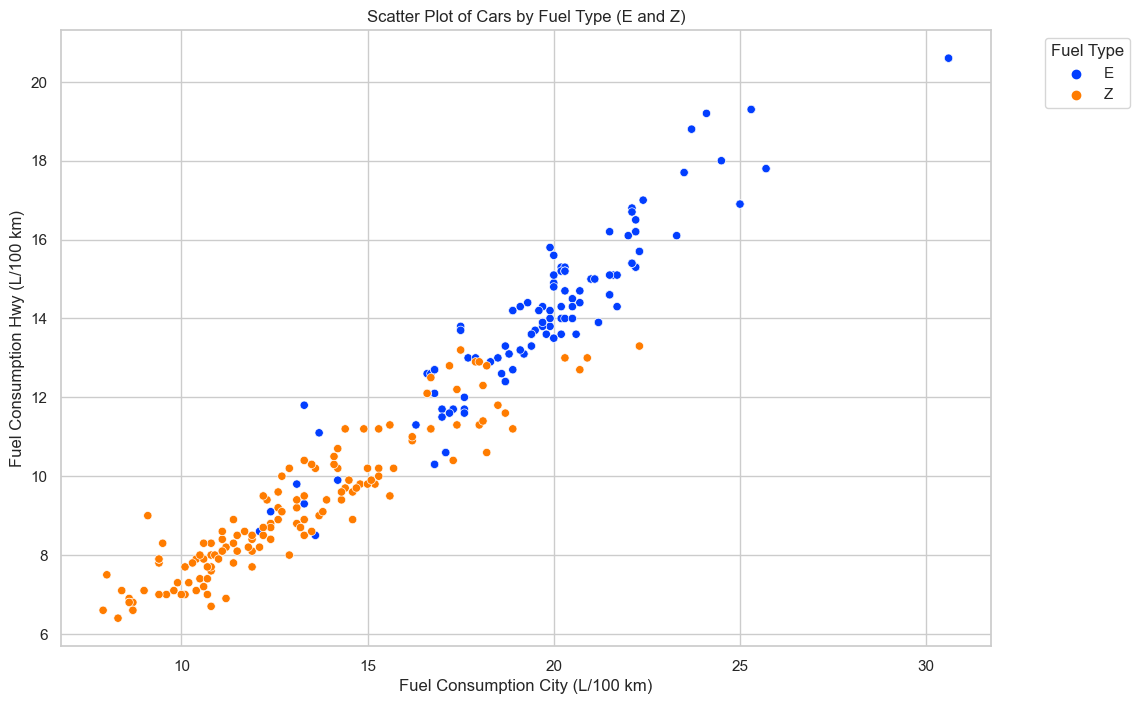

In [11]:
# Filter the dataset for Fuel Types 'E' and 'Z'
ez_df = fuel_df[fuel_df['Fuel Type'].isin(['E', 'Z'])]

# Create the scatter plot for Fuel Types 'E' and 'Z'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ez_df, x='Fuel Consumption City (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', hue='Fuel Type', palette='bright')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Fuel Consumption Hwy (L/100 km)')
plt.title('Scatter Plot of Cars by Fuel Type (E and Z)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [12]:
# Filter the dataset to include only Fuel Types 'E' and 'Z'
ez_df = fuel_df[fuel_df['Fuel Type'].isin(['E', 'Z'])]

# Define features and target variable for 'E' and 'Z'
ez_X = ez_df[['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']]
ez_y = ez_df['Fuel Type']

# Splitting the dataset into training and testing sets for 'E' and 'Z'
ez_X_train, ez_X_test, ez_y_train, ez_y_test = train_test_split(ez_X, ez_y, test_size=0.4, random_state=9)

# Initialize the classifiers for 'E' and 'Z'
ez_log_clf = LogisticRegression(max_iter=1000)
ez_rnd_clf = RandomForestClassifier()
ez_svm_clf = SVC()

# Create the voting classifier for 'E' and 'Z'
ez_voting_clf = VotingClassifier(
    estimators=[('lr', ez_log_clf), ('rf', ez_rnd_clf), ('svm', ez_svm_clf)],
    voting='hard'
)

# Fit and predict with each classifier for 'E' and 'Z'
for clf in (ez_svm_clf, ez_log_clf, ez_rnd_clf, ez_voting_clf):
    clf.fit(ez_X_train, ez_y_train)
    ez_y_pred = clf.predict(ez_X_test)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_score(ez_y_test, ez_y_pred)}")


SVC accuracy: 0.8214285714285714
LogisticRegression accuracy: 0.8571428571428571
RandomForestClassifier accuracy: 0.8571428571428571
VotingClassifier accuracy: 0.8482142857142857


Upon analyzing Fuel Types 'E' and 'Z', we observed comparable performance among Logistic Regression, Random Forest Classifier, and the Voting Classifier. These classifiers demonstrated a notable ability to distinguish between these fuel types. The slightly lower accuracy of the SVC, compared to Logistic Regression and Random Forest, could be attributed to the nature of the data. Given that Logistic Regression and Random Forest performed similarly well, it suggests that the data might be more linearly separable, favoring these methods over the SVC which is typically more suited for non-linear separations.

Going back to the X and Z comparison, we have:

In [13]:
# import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 6)

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           X       0.57      0.34      0.42        50
           Z       0.60      0.79      0.68        62

    accuracy                           0.59       112
   macro avg       0.58      0.57      0.55       112
weighted avg       0.58      0.59      0.57       112
 

Tree Classification Report
              precision    recall  f1-score   support

           X       0.57      0.62      0.60        50
           Z       0.67      0.63      0.65        62

    accuracy                           0.62       112
   macro avg       0.62      0.62      0.62       112
weighted avg       0.63      0.62      0.63       112
 



The analysis revealed that the decision tree stump and the deeper decision tree exhibited similar performance levels. This similarity in performance can occur when the data is relatively simple or when the primary decision boundaries are captured even by a shallow tree, negating the need for additional complexity.

In [14]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           X       0.57      0.34      0.42        50
           Z       0.60      0.79      0.68        62

    accuracy                           0.59       112
   macro avg       0.58      0.57      0.55       112
weighted avg       0.58      0.59      0.57       112
 



The Bagging Classifier, employing decision tree stumps, showed no improvement in classification performance over a single stump, with precision and recall for Fuel Types 'X' and 'Z' mirroring the individual stump's results. 

This suggests that the complexity or diversity of the base learners in the ensemble (in this case, simple stumps) is critical for the effectiveness of bagging, especially when the data might be adequately represented by a single decision boundary.

We will import some example data to explore this concept further.


Building on our previous exploration with k-Nearest Neighbor, we now turn our attention to how ensemble methods might perform with a particularly interesting dataset. We have combined the `make_moons` and `make_circles` datasets, known for their non-linear and complex boundaries, to create a challenging scenario for classification. This combination presents a unique opportunity to evaluate the effectiveness of ensemble methods in handling complex, non-linear data patterns.

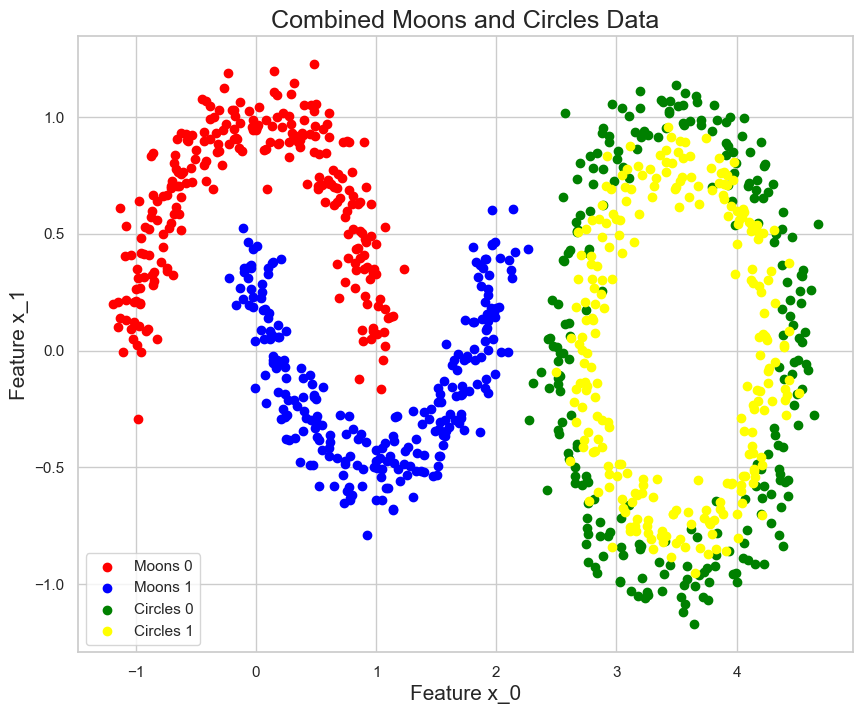

In [15]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

# Generate make_moons and make_circles data
mc_X_moons, mc_y_moons = make_moons(n_samples=500, noise=0.1, random_state=3)
mc_X_circles, mc_y_circles = make_circles(n_samples=500, noise=0.1, random_state=3)

# Offset the circles dataset for better visualization
mc_X_circles[:, 0] += 3.5  # Adjusting x coordinate

# Combine the datasets and rename to X and y
X = np.vstack([mc_X_moons, mc_X_circles])
y = np.hstack([mc_y_moons, mc_y_circles + 2])  # Adding 2 to make the labels distinct

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Moons 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Moons 1')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='green', label='Circles 0')
plt.scatter(X[y == 3, 0], X[y == 3, 1], color='yellow', label='Circles 1')
plt.xlabel('Feature x_0', fontsize=15)
plt.ylabel('Feature x_1', fontsize=15)
plt.title('Combined Moons and Circles Data', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

**IMPORTANT NOTE:** For the ensemble model, it is crucial to set the base decision trees to a minimum depth of 2 due to the presence of four distinct groups in our dataset. A single-level decision stump (depth 1) is too simplistic as it can effectively split only between two classes. Increasing the depth to 2 allows for more complex decision boundaries (up to 4), essential for adequately distinguishing between all four classes.


In [21]:
# Splitting the moons and circles dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

# Single Decision Stump Classifier
stump_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")

# Full Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.93      0.74      0.83        96
           1       0.80      0.94      0.86       104
           2       0.92      0.12      0.21        93
           3       0.56      0.99      0.72       107

    accuracy                           0.71       400
   macro avg       0.80      0.70      0.65       400
weighted avg       0.79      0.71      0.66       400
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.97      0.99       104
           2       0.85      0.60      0.70        93
           3       0.73      0.92      0.81       107

    accuracy                           0.88       400
   macro avg       0.89      0.87      0.87       400
weighted avg       0.89      0.88      0.87       400
 



The results demonstrate a significantly better improvement with a higher depth tree. The deeper decision tree's ability to create complex decision boundaries leads to much more effective classification, especially when handling intricate patterns like those in the combined moons and circles dataset.

In [25]:
# Bagging Classifier with Decision Stumps
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2, random_state=42), 
                            n_estimators=100, 
                            bootstrap=True, 
                            n_jobs=-1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        96
           1       0.89      0.81      0.85       104
           2       0.74      0.43      0.54        93
           3       0.64      0.88      0.74       107

    accuracy                           0.76       400
   macro avg       0.77      0.75      0.75       400
weighted avg       0.77      0.76      0.75       400
 



The Bagging Classifier, employing 100 decision stumps, mirrored the performance of a single decision stump in classifying the combined moons and circles dataset. This result highlights a key aspect of ensemble learning: the effectiveness of an ensemble is heavily dependent on the diversity and complexity of its base learners. In this case, the simplicity of the decision stumps limited the ensemble's ability to effectively handle the complexities of the dataset.

c:\Users\aweso\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


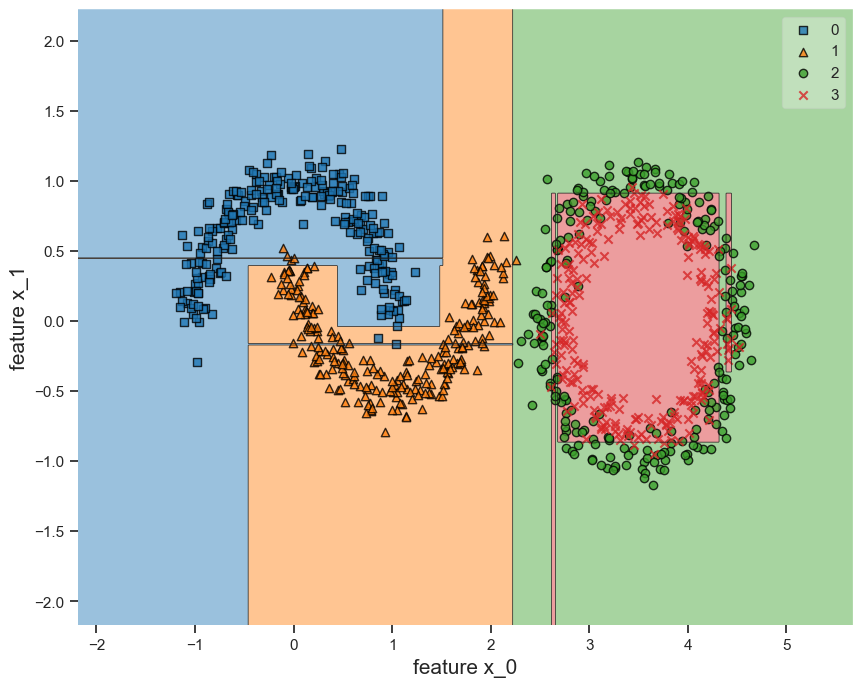

In [23]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

c:\Users\aweso\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


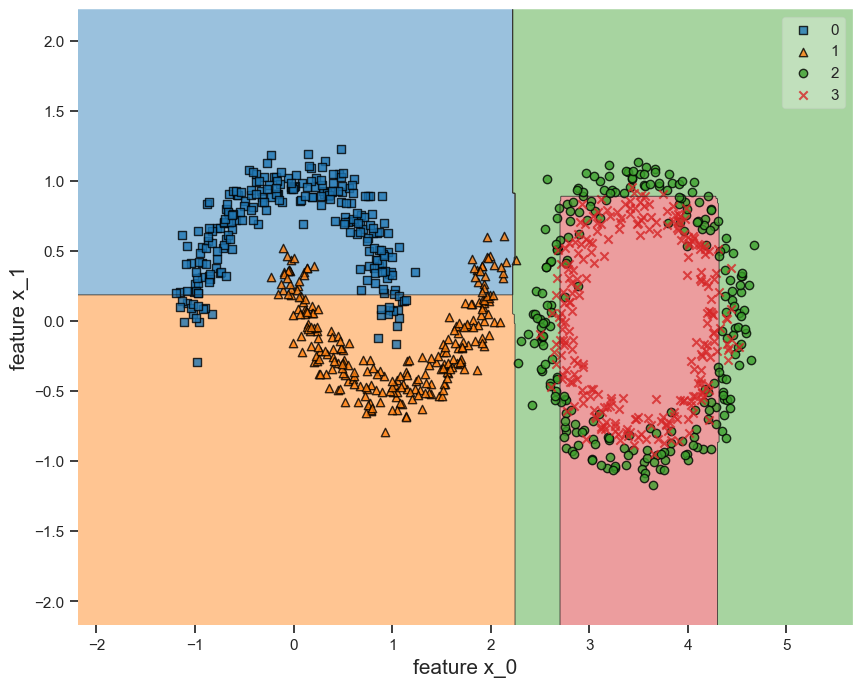

In [26]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

Adjusting the base learners in our ensemble method to have a depth of 2 effectively addressed the challenge of splitting into four distinct groups. This change allowed for a more nuanced classification across all four categories. However, it's notable that despite this improvement, the ensemble method still underperformed compared to a single decision tree with greater depth. This observation suggests that while increasing the complexity of base learners can enhance performance, the ensemble approach may still not match the efficacy of a more deeply structured single model in certain scenarios.